In [1]:
#Importar librerías requeridas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
datos_raw = pd.read_csv('/content/data_colombia.csv')
display(datos_raw)

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Colombia,JAN2014,January 2014,2014,1,January,Hydro,3903.977000,1,47249.092000,NaN,0.684582
1,Colombia,JAN2014,January 2014,2014,1,January,Wind,5.648000,2,69.482000,NaN,0.000990
2,Colombia,JAN2014,January 2014,2014,1,January,Solar,1.065000,3,8.947000,NaN,0.000187
3,Colombia,JAN2014,January 2014,2014,1,January,Total combustible fuels,1792.024000,7,21699.775000,NaN,0.314241
4,Colombia,JAN2014,January 2014,2014,1,January,Coal,521.938000,8,5152.090000,NaN,0.091524
...,...,...,...,...,...,...,...,...,...,...,...,...
2543,Colombia,DEC2022,December 2022,2022,12,December,Non-renewables,1538.170701,23,19520.445158,20404.920447,0.226603
2544,Colombia,DEC2022,December 2022,2022,12,December,Others,224.526296,24,2736.625294,2540.518687,0.033077
2545,Colombia,DEC2022,December 2022,2022,12,December,Other renewables aggregated,181.499851,25,2178.014545,2082.235059,0.026738
2546,Colombia,DEC2022,December 2022,2022,12,December,Low carbon,5249.797902,26,65484.517485,60649.185588,0.773397


In [3]:
#Mostrar informacion general de los datos
datos_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COUNTRY             2548 non-null   object 
 1   CODE_TIME           2548 non-null   object 
 2   TIME                2548 non-null   object 
 3   YEAR                2548 non-null   int64  
 4   MONTH               2548 non-null   int64  
 5   MONTH_NAME          2548 non-null   object 
 6   PRODUCT             2548 non-null   object 
 7   VALUE               2548 non-null   float64
 8   DISPLAY_ORDER       2548 non-null   int64  
 9   yearToDate          2548 non-null   float64
 10  previousYearToDate  2221 non-null   float64
 11  share               2548 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 239.0+ KB


In [4]:
datos_raw.describe()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
count,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2221.000000,2548.000000
mean,2018.164835,6.489403,1738.288980,14.621664,20859.387345,11305.965745,0.269870
std,2.505649,3.448808,2306.595288,7.908072,27543.986218,17623.647931,0.356125
min,2014.000000,1.000000,-224.307384,1.000000,-1301.589000,-1301.589000,-0.037199
25%,2016.000000,3.000000,5.847761,8.000000,69.609358,62.829442,0.000915
50%,2018.000000,6.000000,319.006087,15.000000,3825.121000,2120.757444,0.048288
75%,2020.000000,9.000000,3309.060848,22.000000,47249.092000,15181.601989,0.532113
max,2022.000000,12.000000,7328.362363,27.000000,85124.050543,81511.598561,1.037199


In [5]:
datos_raw.isnull().sum()

,0
COUNTRY,0
CODE_TIME,0
TIME,0
YEAR,0
MONTH,0
MONTH_NAME,0
PRODUCT,0
VALUE,0
DISPLAY_ORDER,0
yearToDate,0


In [6]:
#Crear un nuevo dataset "datos" con las variables de interés

datos = datos_raw[['COUNTRY', 'YEAR', 'MONTH', 'PRODUCT', 'VALUE']]
datos

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE
0,Colombia,2014,1,Hydro,3903.977000
1,Colombia,2014,1,Wind,5.648000
2,Colombia,2014,1,Solar,1.065000
3,Colombia,2014,1,Total combustible fuels,1792.024000
4,Colombia,2014,1,Coal,521.938000
...,...,...,...,...,...
2543,Colombia,2022,12,Non-renewables,1538.170701
2544,Colombia,2022,12,Others,224.526296
2545,Colombia,2022,12,Other renewables aggregated,181.499851
2546,Colombia,2022,12,Low carbon,5249.797902


In [7]:
#Revisar posibles valores de las variables categóricas

valores_PRODUCT = datos['PRODUCT'].unique()
print(valores_PRODUCT)

['Hydro' 'Wind' 'Solar' 'Total combustible fuels' 'Coal' 'Oil'
 'Natural gas' 'Combustible renewables' 'Net electricity production'
 'Total imports' 'Total exports' 'Electricity supplied'
 'Distribution losses' 'Final consumption' 'Electricity trade'
 'Renewables' 'Non-renewables' 'Others' 'Other renewables aggregated'
 'Low carbon' 'Fossil fuels' 'Geothermal' 'Other renewables' 'Nuclear'
 'Other combustible non-renewables' 'Not specified'
 'Used for pumped storage']


In [8]:
#Excluir samples no relevantes eliminando (con "~"") los que están en "valores_excluir"

valores_excluir = ['Total combustible fuels', 'Net electricity production', 'Total imports', 'Total exports', 'Electricity supplied', 'Distribution losses', 'Final consumption', 'Electricity trade', 'Renewables', 'Non-renewables', 'Low carbon', 'Fossil fuels', 'Others', 'Not specified', 'Used for pumped storage', 'Other renewables aggregated', 'Other combustible non-renewables', 'Coal', 'Oil', 'Natural gas',
 'Combustible renewables', 'Other renewables', 'Nuclear']

datos_final = datos[~datos['PRODUCT'].isin(valores_excluir)]
datos_final

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE
0,Colombia,2014,1,Hydro,3903.977000
1,Colombia,2014,1,Wind,5.648000
2,Colombia,2014,1,Solar,1.065000
21,Colombia,2014,2,Hydro,3598.260000
22,Colombia,2014,2,Wind,5.415000
...,...,...,...,...,...
2513,Colombia,2022,11,Wind,6.548488
2514,Colombia,2022,11,Solar,47.831906
2530,Colombia,2022,12,Hydro,5013.084172
2531,Colombia,2022,12,Wind,12.274103


In [9]:
verDatosCategoricos = datos_final['PRODUCT'].unique()
print(verDatosCategoricos)

['Hydro' 'Wind' 'Solar' 'Geothermal']


In [10]:
datos_final.to_csv("nuevo_dataset.csv", index=False)

In [11]:
df = pd.read_csv('/content/nuevo_dataset.csv')
display(df)
df.info()

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE
0,Colombia,2014,1,Hydro,3903.977000
1,Colombia,2014,1,Wind,5.648000
2,Colombia,2014,1,Solar,1.065000
3,Colombia,2014,2,Hydro,3598.260000
4,Colombia,2014,2,Wind,5.415000
...,...,...,...,...,...
363,Colombia,2022,11,Wind,6.548488
364,Colombia,2022,11,Solar,47.831906
365,Colombia,2022,12,Hydro,5013.084172
366,Colombia,2022,12,Wind,12.274103


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  368 non-null    object 
 1   YEAR     368 non-null    int64  
 2   MONTH    368 non-null    int64  
 3   PRODUCT  368 non-null    object 
 4   VALUE    368 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 14.5+ KB


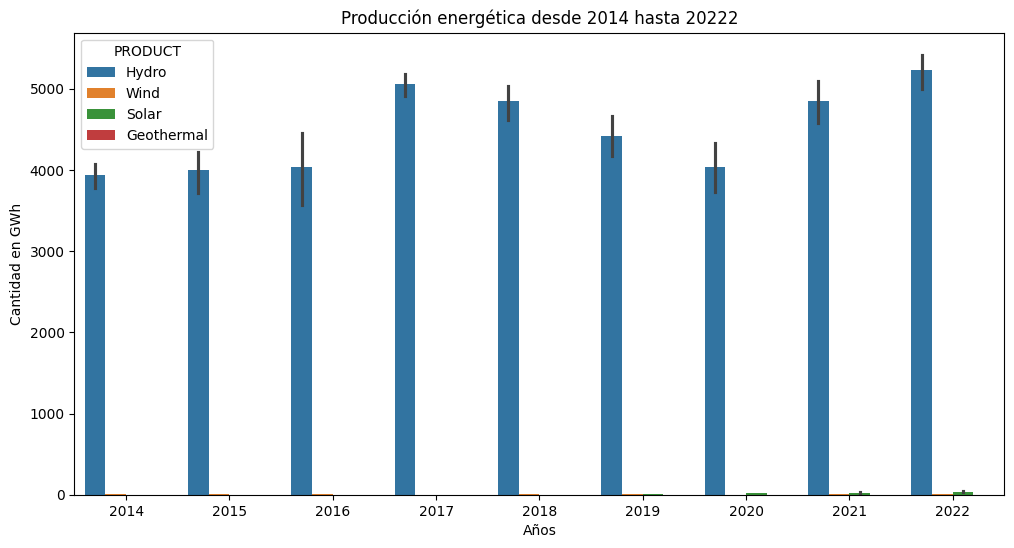

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='VALUE', hue='PRODUCT', data=df, dodge=True)
plt.title('Producción energética desde 2014 hasta 20222')
plt.ylabel('Cantidad en GWh')
plt.xlabel('Años')
plt.show()

In [13]:
#Onehotencoder para PRODUCT
encoder = OneHotEncoder()
encoded_product = encoder.fit_transform(df[["PRODUCT"]]).toarray()
encoded_columns = encoder.get_feature_names_out(["PRODUCT"])

df_encoded = pd.DataFrame(encoded_product, columns=encoded_columns)
df = pd.concat([df, df_encoded], axis=1)
display(df_encoded)

,PRODUCT_Geothermal,PRODUCT_Hydro,PRODUCT_Solar,PRODUCT_Wind
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
363,0.0,0.0,0.0,1.0
364,0.0,0.0,1.0,0.0
365,0.0,1.0,0.0,0.0
366,0.0,0.0,0.0,1.0


In [14]:
display(df)

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE,PRODUCT_Geothermal,PRODUCT_Hydro,PRODUCT_Solar,PRODUCT_Wind
0,Colombia,2014,1,Hydro,3903.977000,0.0,1.0,0.0,0.0
1,Colombia,2014,1,Wind,5.648000,0.0,0.0,0.0,1.0
2,Colombia,2014,1,Solar,1.065000,0.0,0.0,1.0,0.0
3,Colombia,2014,2,Hydro,3598.260000,0.0,1.0,0.0,0.0
4,Colombia,2014,2,Wind,5.415000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
363,Colombia,2022,11,Wind,6.548488,0.0,0.0,0.0,1.0
364,Colombia,2022,11,Solar,47.831906,0.0,0.0,1.0,0.0
365,Colombia,2022,12,Hydro,5013.084172,0.0,1.0,0.0,0.0
366,Colombia,2022,12,Wind,12.274103,0.0,0.0,0.0,1.0


In [15]:
X = df[["YEAR", "MONTH"] + list(encoded_columns)]
y = df["VALUE"]

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=7)

# Se aplica modelo Regresión Lineal de SciKit Learn
Regresion_Lineal = LinearRegression()
Regresion_Lineal.fit(X_entrenamiento, y_entrenamiento)

y_pred_Regresion_Lineal = Regresion_Lineal.predict(X_prueba)

r2_Regresion_Lineal = r2_score(y_prueba, y_pred_Regresion_Lineal)
print("Coeficiente R2 para el modelo de Regresión Lineal es:  " + str(r2_Regresion_Lineal))
mae = mean_absolute_error(y_prueba, y_pred_Regresion_Lineal)
print("MAE:", mae)
mse = mean_squared_error(y_prueba, y_pred_Regresion_Lineal)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_prueba, y_pred_Regresion_Lineal))
print("RMSE:", rmse)

Coeficiente R2 para el modelo de Regresión Lineal es:  0.9748117927838361
MAE: 213.1528261737546
MSE: 121201.10369555597
RMSE: 348.1394888483005


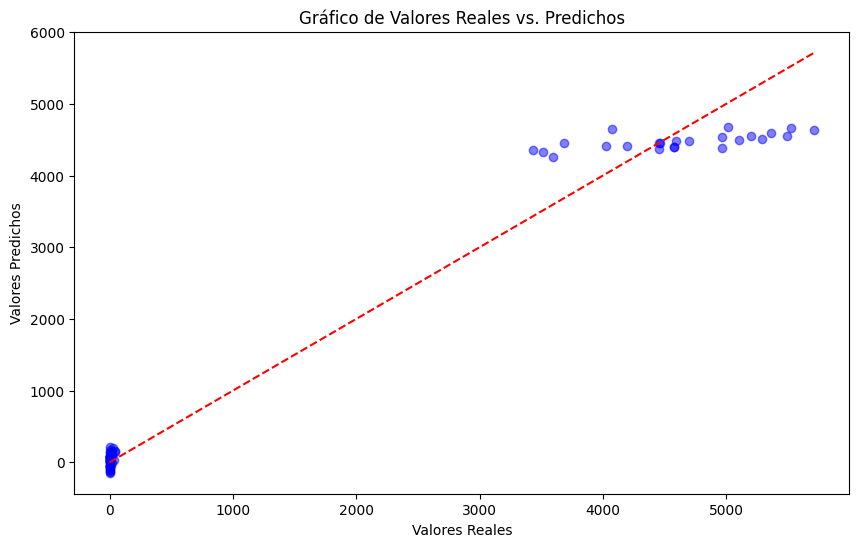

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, y_pred_Regresion_Lineal, color='blue', alpha=0.5)
plt.plot([min(y_prueba), max(y_prueba)], [min(y_prueba), max(y_prueba)], color='red', linestyle='--')

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Valores Reales vs. Predichos")

plt.show()

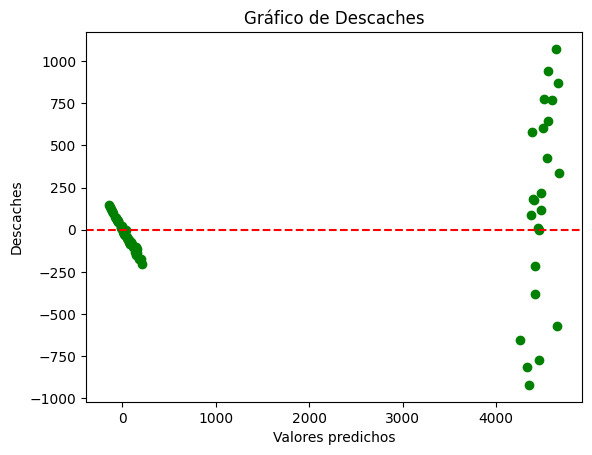

In [17]:
# Gráfico de descaches
descaches = y_prueba - y_pred_Regresion_Lineal
plt.scatter(y_pred_Regresion_Lineal, descaches, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Descaches")
plt.title("Gráfico de Descaches")
plt.show()

In [18]:
#Prueba realizada con datos aleatorios para predecir
categoria = "Geothermal"
categoria_codificada = encoder.transform([[categoria]]).toarray()
#categoria_codificada_df = pd.DataFrame(categoria_codificada, columns=encoder.get_feature_names_out(["PRODUCT"]))
print(categoria_codificada[0][0])
nuevos_datos = [2025,2,0.0,1.0,0.0,0.0]
prediccion = Regresion_Lineal.predict([nuevos_datos])
print("La predicción para el año 2025 es: ", prediccion)

1.0
La predicción para el año 2025 es:  [4590.25504692]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
#exportamos el modelo binarizado
with open('modelo_energia.pkl', 'wb') as archivo:
    pickle.dump(Regresion_Lineal, archivo)

In [20]:
#exportamos el encode binarizado
with open('energia_encoder.pkl', 'wb') as archivo:
    pickle.dump(encoder, archivo)